# Waste Classification with VGG19: Code Walkthrough
This project demonstrates a deep learning pipeline for classifying recyclable and household waste using a pre-trained VGG19 model. Below is a detailed breakdown of the code.

# Libraries and Preprocessing
Imports essential libraries for data manipulation, visualization, and model training.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Dataset Download
Downloads the waste classification dataset from Kaggle using kagglehub.

The path variable stores the location of the dataset files for later use.

In [1]:

image_dir = kagglehub.dataset_download("alistairking/recyclable-and-household-waste-classification")

print("Path to dataset files:", image_dir)

100%|██████████| 920M/920M [00:20<00:00, 47.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1


# Image Augmentation
Prepares data augmentation to increase dataset diversity and prevent overfitting.

Augmentations include rotation, zoom, flips, and shifts.

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

# Data Preparation
Sets parameters for input image size, batch size, and training epochs.

In [ ]:
input_size = (256, 256)
batch_size = 32
epochs = 25

# Train and Validation Generators
Splits the dataset into training and validation subsets (80%-20% split).

Resizes images to (256x256) and organizes them into batches.

In [ ]:
train_gen = datagen.flow_from_directory(
    image_dir,
    target_size = input_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 12000 images belonging to 30 classes.


In [ ]:
valid_gen = datagen.flow_from_directory(
    image_dir,
    target_size = input_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 3000 images belonging to 30 classes.


# VGG19 Model Implementation
Loads a pre-trained VGG19 model (without the top classification layer).

Freezes pre-trained layers to retain their features.

Adds custom dense layers for the classification task.

Specifies the optimizer (Adam), loss function (categorical_crossentropy), and evaluation metric (accuracy).

Trains the model for the specified number of epochs, using the training and validation datasets.

In [ ]:
def create_vgg19_model(num_classes):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    return model

vgg19_model = create_vgg19_model(len(train_gen.class_indices))
vgg19_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_vgg19 = vgg19_model.fit(
    train_gen,
    epochs=epochs,
    validation_data=valid_gen
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731949915.917772      93 service.cc:145] XLA service 0x7f3b040063e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731949915.917922      93 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731949915.917930      93 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/375 ━━━━━━━━━━━━━━━━━━━━ 2:38:25 25s/step - accuracy: 0.0938 - loss: 3.4689

I0000 00:00:1731949932.654104      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.2496 - loss: 2.8286 - val_accuracy: 0.5273 - val_loss: 1.7338
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 323s 849ms/step - accuracy: 0.5051 - loss: 1.7492 - val_accuracy: 0.5707 - val_loss: 1.4477
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 323s 849ms/step - accuracy: 0.5589 - loss: 1.5021 - val_accuracy: 0.5897 - val_loss: 1.3484
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 321s 842ms/step - accuracy: 0.5936 - loss: 1.3718 - val_accuracy: 0.5880 - val_loss: 1.3540
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 847ms/step - accuracy: 0.6084 - loss: 1.3043 - val_accuracy: 0.6270 - val_loss: 1.2330
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 844ms/step - accuracy: 0.6220 - loss: 1.2509 - val_accuracy: 0.6187 - val_loss: 1.2254
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 318s 836ms/step - accuracy: 0.6396 - loss: 1.1845 - val_accuracy: 0.6230 - val_loss: 1.2179
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 846ms/step - accuracy: 0.6456 - loss: 1.1666 

# Model Evaluation
# Evaluation and Visualization

Evaluates the model using the confusion matrix and classification report.

Visualizes the confusion matrix and training/validation accuracy.

94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 675ms/step

=== VGG19 Evaluation ===

Classification Report:
                            precision    recall  f1-score   support

              aerosol_cans       0.07      0.08      0.07       100
        aluminum_food_cans       0.04      0.06      0.05       100
        aluminum_soda_cans       0.01      0.01      0.01       100
           cardboard_boxes       0.03      0.03      0.03       100
       cardboard_packaging       0.01      0.01      0.01       100
                  clothing       0.01      0.01      0.01       100
            coffee_grounds       0.02      0.02      0.02       100
disposable_plastic_cutlery       0.06      0.05      0.06       100
                 eggshells       0.05      0.05      0.05       100
                food_waste       0.02      0.02      0.02       100
    glass_beverage_bottles       0.03      0.03      0.03       100
 glass_cosmetic_containers       0.04      0.03      0.03       100
           glass_food_j

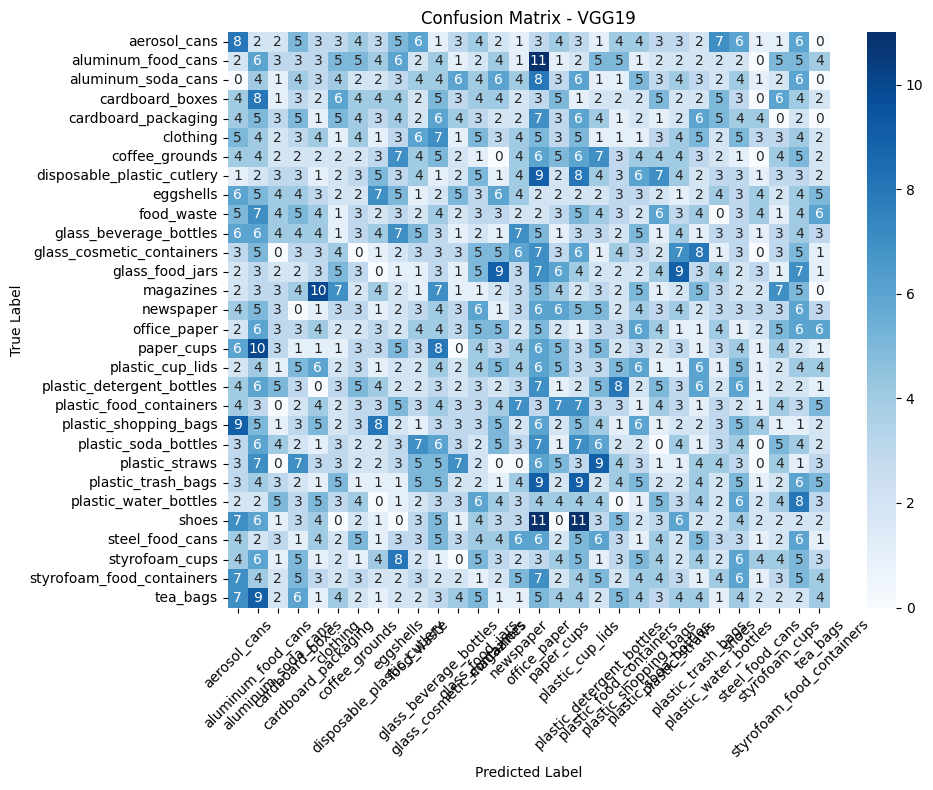

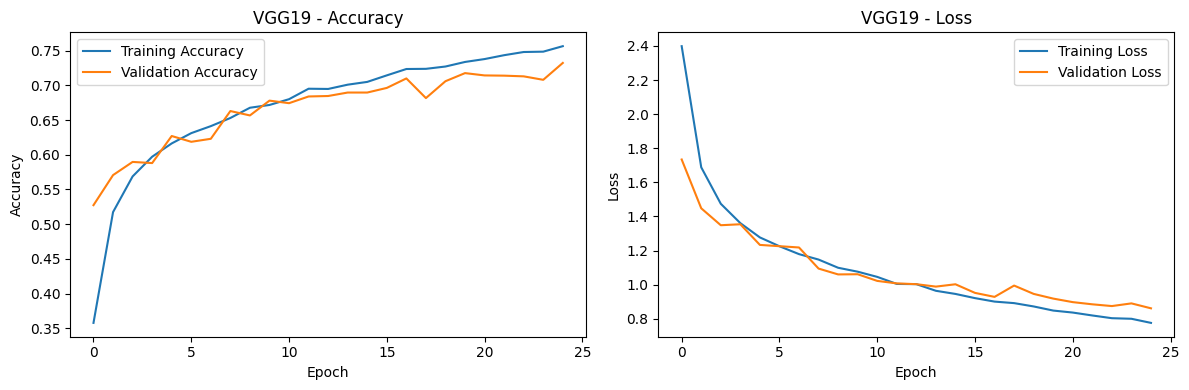

In [ ]:
def evaluate_vgg19(model, valid_gen, history):
    y_pred_prob = model.predict(valid_gen)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = valid_gen.classes

    class_labels = list(valid_gen.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)

    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

    print("\n=== VGG19 Evaluation ===")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title('Confusion Matrix - VGG19')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('VGG19 - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('VGG19 - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


evaluate_vgg19(vgg19_model, valid_gen, history_vgg19)

# Accuracy, Precision, F1 Score and Recall
Computes class-wise metrics for deeper insight into model performance.

In [ ]:
def get_vgg19_metrics(model, valid_gen):
    y_pred_prob = model.predict(valid_gen)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = valid_gen.classes

    cm = confusion_matrix(y_true, y_pred)

    report = classification_report(y_true, y_pred, output_dict=True)

    TP = np.sum(np.diag(cm))  # Sum of diagonal elements
    FP = np.sum(cm) - TP  # All incorrect predictions
    FN = FP  # In multiclass, FP and FN are the same for overall metrics
    TN = np.sum(cm) * (len(cm) - 1)  # All correct rejections across all classes

    print("\nVGG19 Model Metrics:")
    print(f"Accuracy:       {report['accuracy']:.4f}")
    print(f"Precision:      {report['weighted avg']['precision']:.4f}")
    print(f"Recall:         {report['weighted avg']['recall']:.4f}")
    print(f"F1 Score:       {report['weighted avg']['f1-score']:.4f}")
    print(f"True Positive:  {TP}")
    print(f"False Positive: {FP}")
    print(f"True Negative:  {TN}")
    print(f"False Negative: {FN}")

# Get VGG19 metrics
get_vgg19_metrics(vgg19_model, valid_gen)

94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 683ms/step

VGG19 Model Metrics:
Accuracy:       0.0357
Precision:      0.0355
Recall:         0.0357
F1 Score:       0.0351
True Positive:  107
False Positive: 2893
True Negative:  87000
False Negative: 2893
